In [1]:
#import pandas as pd
import numpy as np
import datetime
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from datetime import datetime

In [2]:
import matplotlib.pyplot as plt # plotting
import os # accessing directory structure

In [3]:
import tensorflow as tf
from keras import layers
from keras import models
import gc
from tensorflow.keras.callbacks import ModelCheckpoint

In [4]:
def make_target(era_fname, mapping):
    era = np.load(era_fname)
    data = np.reshape(era, (era.shape[0],era.shape[1], -1))
    target = np.zeros((24,3,len(mapping)))
    for i in range(len(mapping)):
        target[:,:,i] = data[:,:,mapping[i]]
    
    return target


In [5]:
mapping = np.load('wrferaMapping.npy')
landmask = np.load('landmask.npy')

In [304]:
#creates era files mapped to wrf node matrixwrf_shape = (24,3,210,280)
wrf_shape = (24,3,210,280)

era_path = os.getcwd()+'\\train\\era5\\'
target_path = os.getcwd()+'\\train\\target\\'
for dirname, _, filenames in os.walk(era_path):
    for filename in filenames:
        era_fname = os.path.join(era_path, filename)
        df = make_target(era_fname, mapping)
        target_fname = os.path.join(target_path,filename)
        df = np.reshape(df,wrf_shape)
        np.save(target_fname,df)
    

(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58

KeyboardInterrupt: 

In [6]:
def scale_data(data):
    data[:,2,:,:] = data[:,2,:,:]/100
    data=data/20
    return data
def invert_scale_data(data):
    data=data*20
    data[:,2,:,:] = data[:,2,:,:]*100
    return data

In [7]:
def scale_error(error):
    error=error/20
    return error
def invert_scale_error(error):
    error=error*20
    return error

In [8]:
import os
import glob
import numpy as np
import tensorflow as tf

# Specify the folder containing your .npy files

wrf_path = os.getcwd()+'\\train\\wrf\\'
target_path = os.getcwd()+'\\train\\target\\'
# Get a list of .npy files in the folder
file_list = sorted(glob.glob(os.path.join(wrf_path, '*.npy')))
target_list = sorted(glob.glob(os.path.join(target_path, '*.npy')))
# Shuffle the file list if needed
numbers = list(range(len(file_list)))
np.random.shuffle(numbers)

# Define a custom data generator iterator
def data_generator(file_list, target_list, numbers, epochs):
    for k in range(epochs):
        for i in numbers:
            # Load data from the .npy file
            data = np.load(file_list[i])
            #scaling wrf data, but not target era5
            data = scale_data(data)
            target = np.load(target_list[i])
            
            yield data, target



In [12]:
batch_size=32
input_shape =(batch_size, 3, 210, 280)

model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(20, 3, activation='relu', data_format='channels_first'),
  tf.keras.layers.Conv2D(10, 3, activation='relu', data_format='channels_first'),
  tf.keras.layers.Conv2D(10, 3, activation='relu', data_format='channels_first'),
  tf.keras.layers.Conv2D(5, 3, activation='relu', data_format='channels_first'),
  tf.keras.layers.Conv2D(5, 3, activation='relu', data_format='channels_first'),
  tf.keras.layers.Conv2D(5, 3, activation='relu', data_format='channels_first'),
    tf.keras.layers.Conv2DTranspose(5, 3, activation='relu', data_format='channels_first'),
    tf.keras.layers.Conv2DTranspose(5, 3, activation='relu', data_format='channels_first'),
    tf.keras.layers.Conv2DTranspose(5, 3, activation='relu', data_format='channels_first'),
    tf.keras.layers.Conv2DTranspose(10, 3, activation='relu', data_format='channels_first'),
    tf.keras.layers.Conv2DTranspose(10, 3, activation='relu', data_format='channels_first'),
    tf.keras.layers.Conv2DTranspose(3, 3, activation='relu', data_format='channels_first')
  
  
])

In [13]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.MeanSquaredError(),
  metrics=['mean_squared_error'])
model.build(input_shape=input_shape)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (32, 20, 208, 278)        560       
                                                                 
 conv2d_7 (Conv2D)           (32, 10, 206, 276)        1810      
                                                                 
 conv2d_8 (Conv2D)           (32, 10, 204, 274)        910       
                                                                 
 conv2d_9 (Conv2D)           (32, 5, 202, 272)         455       
                                                                 
 conv2d_10 (Conv2D)          (32, 5, 200, 270)         230       
                                                                 
 conv2d_11 (Conv2D)          (32, 5, 198, 268)         230       
                                                                 
 conv2d_transpose_6 (Conv2DT  (32, 5, 200, 270)       

In [25]:
epochs=10

# Create a dataset from the data generator
#dataset = tf.data.Dataset.from_generator(data_generator, output_signature=tf.TensorSpec(shape=(None, None), dtype=tf.float32))
train_set = data_generator(file_list, target_list, numbers[:len(numbers)*7//10], epochs*2)
val_set = data_generator(file_list, target_list, numbers[len(numbers)*7//10:len(numbers)*8//10], epochs*2)
test_set = data_generator(file_list, target_list, numbers[len(numbers)*8//10:], 1)

# Specify the checkpoint file path and set up the ModelCheckpoint callback
checkpoint_path = 'best_model_checkpoint.keras'
checkpoint_callback = ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, save_weights_only=False, mode='min', verbose=1)



history = model.fit(
  train_set,
  validation_data=val_set,
  epochs=epochs,
    steps_per_epoch=250,
    validation_steps=35,
    batch_size = batch_size, 
    callbacks=[checkpoint_callback]
    )

Epoch 1/10
250/250 [==============================] - ETA: 0s - loss: 34.2750 - mean_squared_error: 34.2750
Epoch 1: val_loss improved from inf to 41.13326, saving model to best_model_checkpoint.keras
250/250 [==============================] - 14s 56ms/step - loss: 34.2750 - mean_squared_error: 34.2750 - val_loss: 41.1333 - val_mean_squared_error: 41.1333
Epoch 2/10
250/250 [==============================] - ETA: 0s - loss: 34.4963 - mean_squared_error: 34.4963
Epoch 2: val_loss improved from 41.13326 to 39.26809, saving model to best_model_checkpoint.keras
250/250 [==============================] - 14s 57ms/step - loss: 34.4963 - mean_squared_error: 34.4963 - val_loss: 39.2681 - val_mean_squared_error: 39.2681
Epoch 3/10
250/250 [==============================] - ETA: 0s - loss: 34.4618 - mean_squared_error: 34.4618
Epoch 3: val_loss did not improve from 39.26809
250/250 [==============================] - 14s 57ms/step - loss: 34.4618 - mean_squared_error: 34.4618 - val_loss: 39.9023 

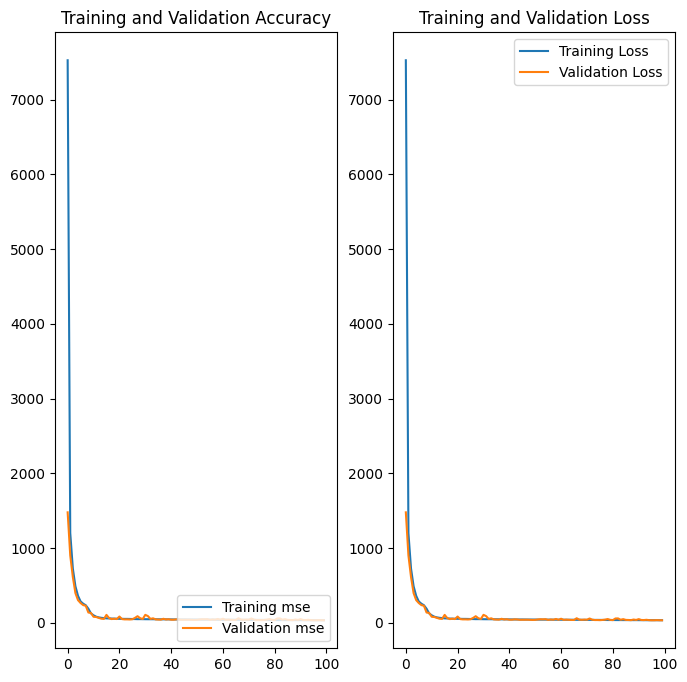

In [15]:

acc = history.history['mean_squared_error']
val_acc = history.history['val_mean_squared_error']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training mse')
plt.plot(epochs_range, val_acc, label='Validation mse')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [26]:
model.evaluate(test_set)

73/73 [==============================] - 3s 45ms/step - loss: 45.8099 - mean_squared_error: 45.8099


[45.809871673583984, 45.80988693237305]

In [34]:
model = tf.keras.models.load_model('best_model_checkpoint.keras')

In [35]:
model.save('Encoder_CNN_100_epochs_model.keras')

In [21]:
#evaluate model on test set example to calculate approx M value - we nake the same date files
test = np.load(wrf_path+'wrfout_d01_2019-12-28_00%3A00%3A00.npy')
test_scaled = scale_data(test)
target_val = np.load(target_path+'era_uv10_t2_2019-12-28.npy')
predict = model.predict(test_scaled)
#we add correction to the initial wrf test data
wrf_corrected = predict+test

In [24]:
#calculate approx M metrics
M_approx=(mean_squared_error(np.ravel(target_val), np.ravel(test))-mean_squared_error(np.ravel(target_val), np.ravel(wrf_corrected)))/mean_squared_error(np.ravel(target_val), np.ravel(test))
print(M_approx)

0.9977993894228766

In [32]:
tf.__version__

'2.10.1'